In [65]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
data = pd.read_csv('loan.csv')

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(887379, 74)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [7]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [8]:
used_cols = ['loan_amnt', 'term', 'int_rate', 'grade', 'issue_d', 'addr_state', 'loan_status']
used_data = data[used_cols]

In [9]:
used_data.head()

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status
0,5000.0,36 months,10.65,B,Dec-2011,AZ,Fully Paid
1,2500.0,60 months,15.27,C,Dec-2011,GA,Charged Off
2,2400.0,36 months,15.96,C,Dec-2011,IL,Fully Paid
3,10000.0,36 months,13.49,C,Dec-2011,CA,Fully Paid
4,3000.0,60 months,12.69,B,Dec-2011,OR,Current


###  1. Check the counts by different loan status

In [10]:
used_data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

### 2. Check the loan amount by month


In [17]:
# Tranfer the datetime

time = pd.to_datetime(used_data['issue_d'])
used_data.loc[:,'issue_d2'] = time


In [12]:
used_data.head()

,loan_amnt,term,int_rate,grade,issue_d,addr_state,loan_status,issue_d2
0,5000.0,36 months,10.65,B,Dec-2011,AZ,Fully Paid,2011-12-01
1,2500.0,60 months,15.27,C,Dec-2011,GA,Charged Off,2011-12-01
2,2400.0,36 months,15.96,C,Dec-2011,IL,Fully Paid,2011-12-01
3,10000.0,36 months,13.49,C,Dec-2011,CA,Fully Paid,2011-12-01
4,3000.0,60 months,12.69,B,Dec-2011,OR,Current,2011-12-01


In [13]:
data_group_by_date = used_data.groupby(['issue_d2']).sum()
print(data_group_by_date.head())

            loan_amnt  int_rate
issue_d2                       
2007-06-01    91850.0    235.55
2007-07-01   348325.0    702.99
2007-08-01   515300.0    854.22
2007-09-01   372950.0    660.55
2007-10-01   753225.0   1306.04


In [32]:
data_group_by_date.reset_index(inplace=True)
data_group_by_date['issue_month'] = data_group_by_date['issue_d2'].apply(lambda x: x.to_period('M'))

load_amount_group_by_month = data_group_by_date.groupby('issue_month')['loan_amnt'].sum()
load_amount_group_by_month_df = pd.DataFrame(load_amount_group_by_month).reset_index()
print('\n Sum of loan amount by month: ')
print(load_amount_group_by_month_df.head())


 Sum of loan amount by month: 
  issue_month  loan_amnt
0     2007-06    91850.0
1     2007-07   348325.0
2     2007-08   515300.0
3     2007-09   372950.0
4     2007-10   753225.0


In [15]:
# save the results to csv
load_amount_group_by_month_df.to_csv('load_amount_by_month.csv', index=False)

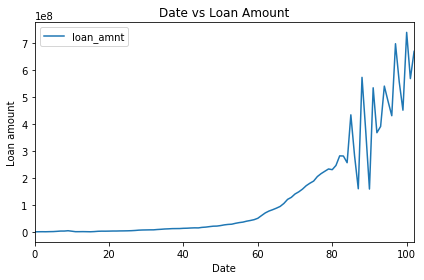

In [56]:
load_amount_group_by_month_df.plot()
plt.xlabel('Date')
plt.ylabel('Loan amount')
plt.title('Date vs Loan Amount')
plt.tight_layout()
plt.savefig('loan_amount_vs_month.png')
plt.show()


### 3. Caculate loan amount by state


In [18]:
data_group_by_state = used_data.groupby(['addr_state'])['loan_amnt'].sum()

In [19]:
data_group_by_state_df = pd.DataFrame(data_group_by_state).reset_index()
print('\nSum of loan amount by state：')
print(data_group_by_state_df.head())


Sum of loan amount by state：
  addr_state     loan_amnt
0         AK  3.697805e+07
1         AL  1.646276e+08
2         AR  9.341608e+07
3         AZ  2.901101e+08
4         CA  1.898145e+09


In [20]:
# save the result
data_group_by_state_df.to_csv('load_amount_by_state.csv', index=False)

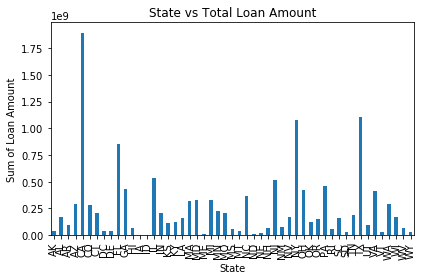

In [35]:
data_group_by_state.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Sum of Loan Amount')
plt.title('State vs Total Loan Amount')
plt.tight_layout()
plt.savefig('loan_amount_vs_state.png')
plt.show()

### 4. Grade, term, and interest rate

In [21]:
data_group_by_grade_term = used_data.groupby(['grade', 'term'])['int_rate'].mean()
data_group_by_grade_term_df = pd.DataFrame(data_group_by_grade_term).reset_index()
print('\nRelation among Grade,Term,Interest Rate：')
print(data_group_by_grade_term_df.head(10))
   


Relation among Grade,Term,Interest Rate：
  grade        term   int_rate
0     A   36 months   7.215919
1     A   60 months   7.998581
2     B   36 months  10.864500
3     B   60 months  10.655718
4     C   36 months  13.921937
5     C   60 months  14.093312
6     D   36 months  17.163474
7     D   60 months  17.190871
8     E   36 months  19.764985
9     E   60 months  19.956477


In [22]:
 # Save the results
data_group_by_grade_term_df.to_csv('intrate_by_grade_term.csv', index=False)


In [24]:
 # Transfer to pivot table
data_group_by_grade_term_pivot = data_group_by_grade_term_df.pivot(index='grade', columns='term', values='int_rate')

data_group_by_grade_term_pivot.to_csv('intrate_by_grade_term2.csv')

In [25]:
print(data_group_by_grade_term_pivot)

term    36 months   60 months
grade                        
A        7.215919    7.998581
B       10.864500   10.655718
C       13.921937   14.093312
D       17.163474   17.190871
E       19.764985   19.956477
F       23.325132   23.644718
G       23.982595   25.861530


### 5. The distribution of Loan Status

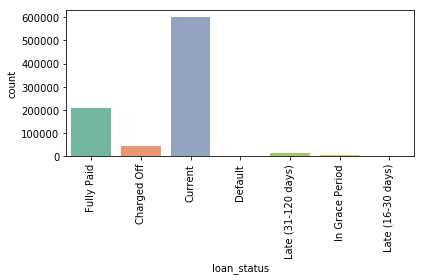

In [43]:
df_status = data.loc[data['loan_status'].isin(
        ['Current', 'Charged Off', 'Default', 'Fully Paid', 'In Grace Period', 'Late (16-30 days)',
         'Late (31-120 days)'])]
plt.xticks(rotation=90)
plt.xlabel('Loan Status')
sns.countplot(df_status['loan_status'], palette='Set2')
plt.tight_layout()
plt.savefig('loan_status.png')
plt.show()

### 6. Variables transform and label

In [48]:
# Keep only the Fully paid,Charged off, and Default

filter_mask = data['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])
filter_data = data[filter_mask]
print(filter_data['loan_status'].value_counts())

Fully Paid     207723
Charged Off     45248
Default          1219
Name: loan_status, dtype: int64


In [36]:
# Create the labels: 'Fully paid'-> 0 'Otherwise' -> 1
def create_label(status):
    label = 1
    if status == 'Fully Paid':
        label = 0
    return label
proc_filter_data = filter_data.copy()
proc_filter_data['label'] = filter_data['loan_status'].apply(create_label)

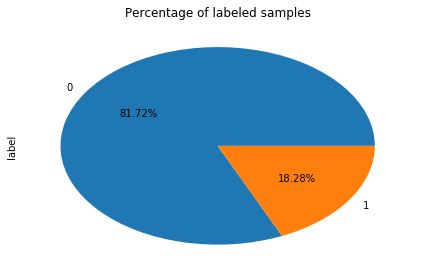

In [52]:
proc_filter_data['label'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Percentage of labeled samples')
plt.tight_layout()
plt.savefig('label_pie.png')
plt.show()

In [54]:
# Use apply() to deal with 'emp_length'

def proc_emp_length(emp_length_val):
    """
            '< 1 year'  -> 0.5
            'n/a'       -> 0.5
            '10+ years' -> 10
             others     -> cosponding years ('2 years' -> 2)
    """

    if emp_length_val == '< 1 year' or emp_length_val == 'n/a':
        emp_length_feat = 0.5
    elif emp_length_val == '10+ years':
        emp_length_feat = 10
    else:
        emp_length_feat = float(emp_length_val.rstrip(' years'))
    return emp_length_feat

proc_filter_data['emp_length_feat'] = filter_data['emp_length'].apply(proc_emp_length)


### 7. The Purpose of Loan

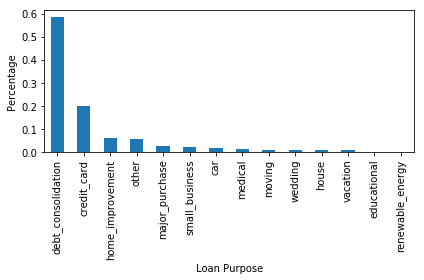

In [57]:
all_rows = proc_filter_data['purpose']
pur = proc_filter_data['purpose'].value_counts()
purp = pur / len(all_rows)
purp.plot(kind='bar')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('loan_amount_purpose.png')
plt.show()

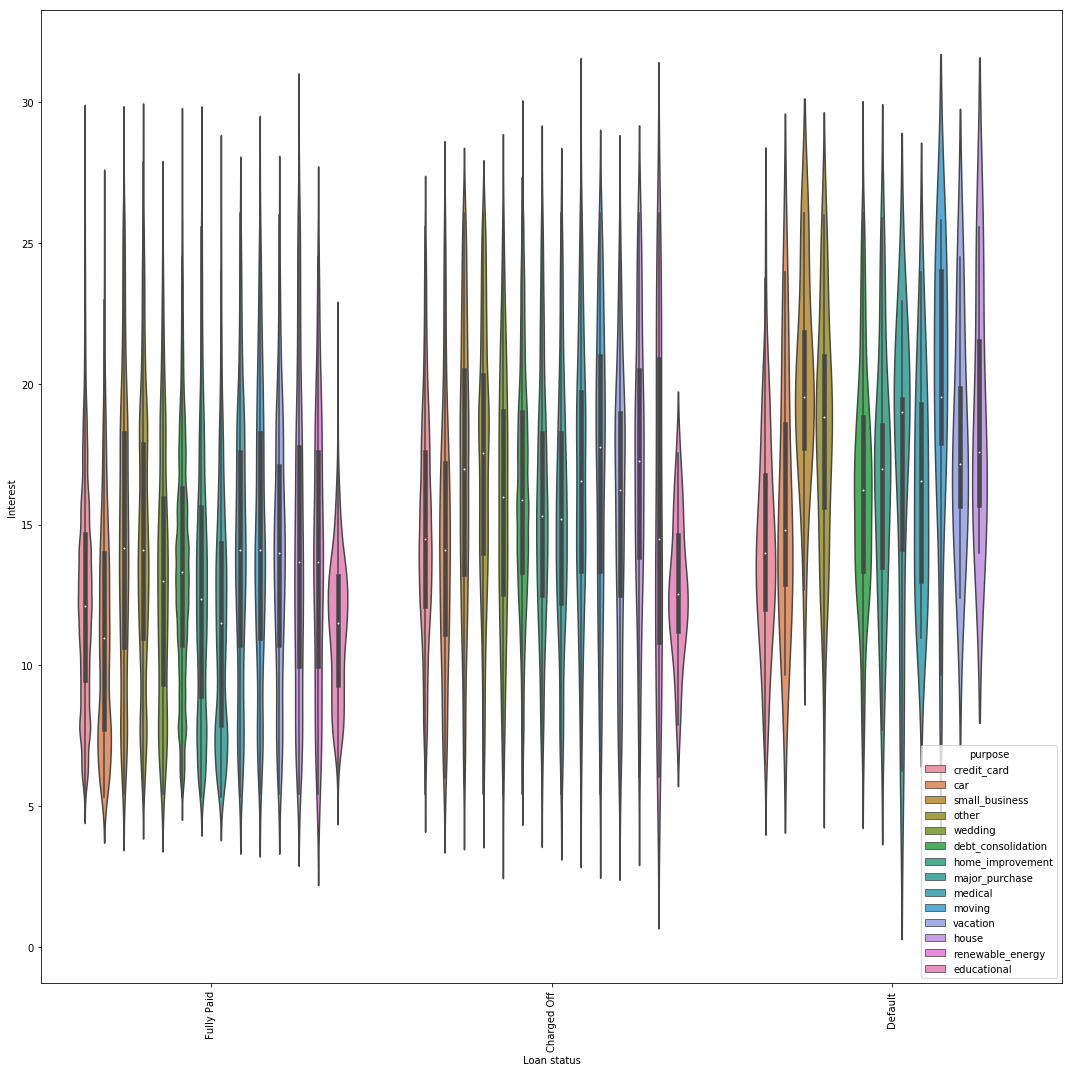

In [63]:
plt.figure(figsize=(15, 15))
sns.violinplot(data=proc_filter_data[['loan_status','int_rate','purpose']], x='loan_status', y='int_rate', jitter=True,
                   hue='purpose')
plt.xticks(rotation=90)
plt.xlabel('Loan status')
plt.ylabel('Interest')
plt.tight_layout()
plt.savefig('loan_status_purpose_int_rate_dist.png')
plt.show()

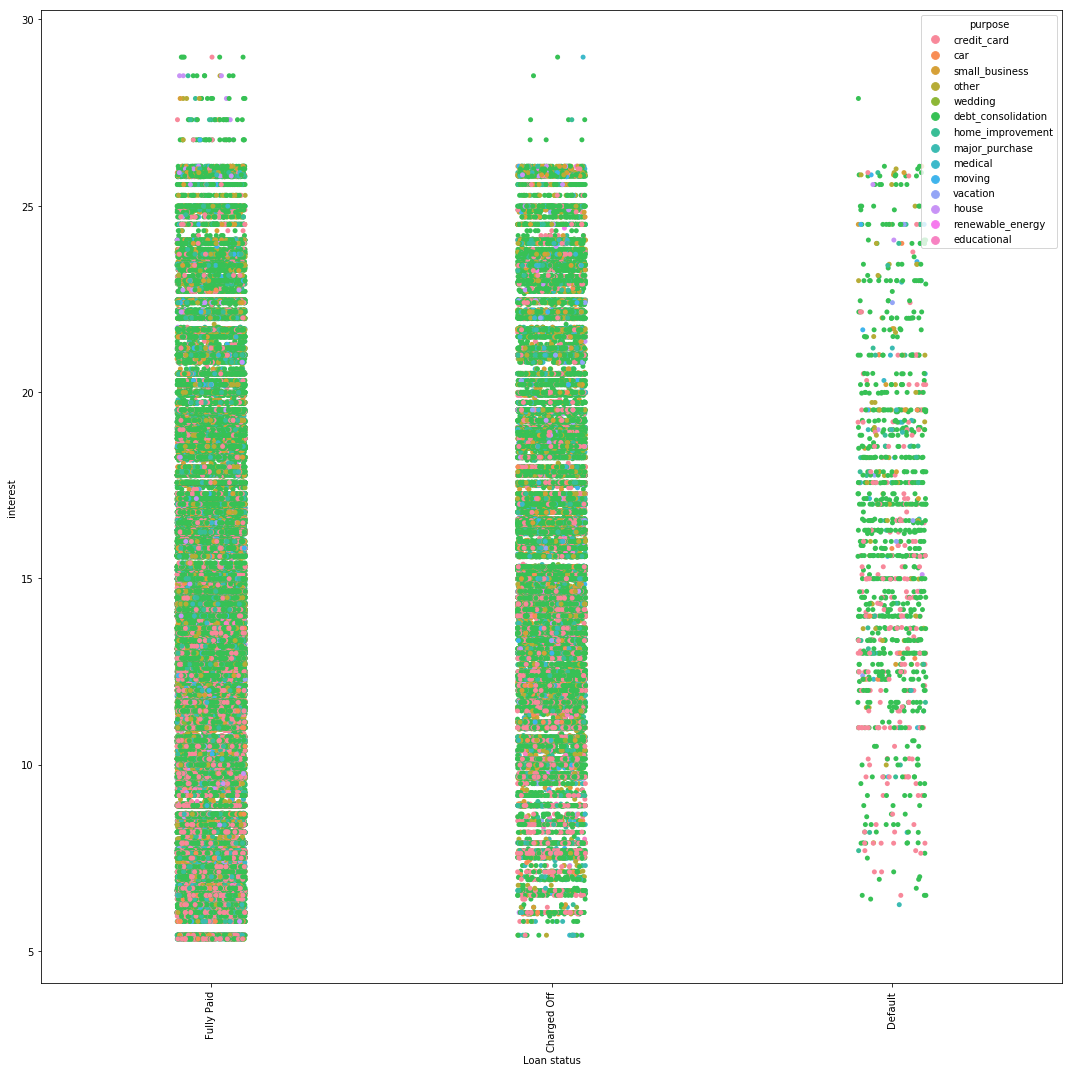

In [59]:
plt.figure(figsize=(15, 15))
sns.stripplot(data=proc_filter_data[['loan_status', 'int_rate', 'purpose']], x='loan_status', y='int_rate', jitter=True,
                  hue='purpose')
plt.xticks(rotation=90)
plt.xlabel('Loan status')
plt.ylabel('interest')
plt.tight_layout()
plt.savefig('loan_status_purpose_int_rate.png')
plt.show()

### Correlation among variables

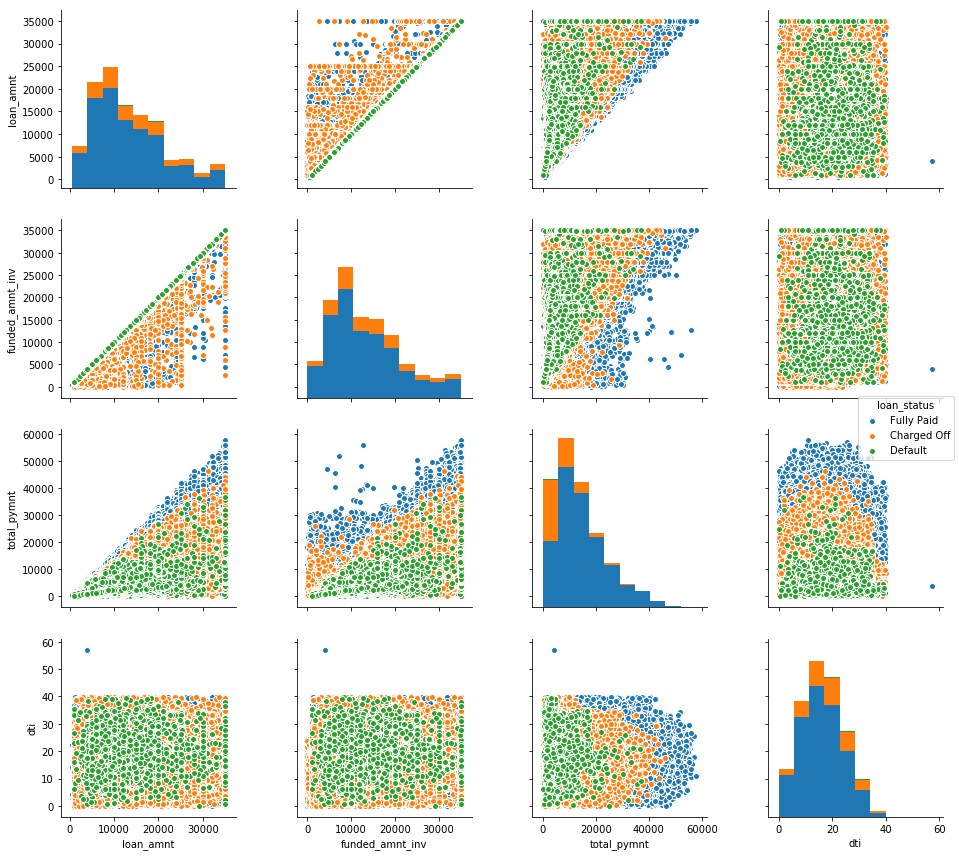

In [58]:
sns.pairplot(proc_filter_data[['loan_amnt', 'funded_amnt_inv', 'total_pymnt',
                                   'dti', 'loan_status']].dropna(), hue='loan_status',
                 size=3)
plt.tight_layout()
plt.savefig('var_relation.png')
plt.show()

## Build the Predict Model

In [66]:
X, y = make_classification(
            n_samples=2000,
            n_features=20,
            n_classes=2,
            random_state=17)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=17)